Computation graphs
---

In [1]:
import pandas as pd

# Load data
data_df = pd.read_csv('brain-body-weights.csv')

# First five rows
data_df.head()

,body,brain,mammal
0,1.6,-2.0,Lesser short-tailed shrew
1,2.3,-1.4,Little brown bat
2,3.1,-1.2,Big brown bat
3,3.1,-0.9,Mouse
4,3.9,-1.1,Musk shrew


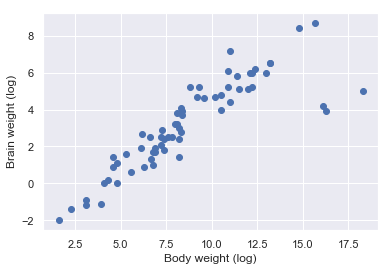

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Activate Seaborn
sns.set()

# Plot data
plt.scatter(data_df.body, data_df.brain)
plt.xlabel('Body weight (log)')
plt.ylabel('Brain weight (log)')
plt.show()

In [3]:
import tensorflow as tf

### Variables

In [4]:
# Slope and intercept parameters
a = tf.Variable(initial_value=0, dtype=tf.float32)
b = tf.Variable(initial_value=0, dtype=tf.float32)

In [5]:
# Comment: tf will use tf.int32 if we don't specify (because of 0)

### Placeholders

In [6]:
# Create a placeholder for input/target data
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

In [7]:
# Compute predictions
y_hat = a*x + b

### Loss Function

In [8]:
# Mean squared error (MSE)
loss = tf.reduce_mean( # Equivalent to np.mean()
    tf.square( # Equivalent to np.square()
        y - y_hat # Implements broadcasting like Numpy
    )
)

In [9]:
# Huber loss
loss = tf.losses.huber_loss(y, y_hat, delta=1.0)

### Optimizer

In [10]:
# Create the optimizer
gd = tf.train.GradientDescentOptimizer(
    learning_rate=0.1)

In [11]:
# Learning rate placeholder
lr = tf.placeholder(dtype=tf.float32)

# Create the optimizer
gd = tf.train.GradientDescentOptimizer(
    learning_rate=lr)

In [12]:
# Create a training operation
train_op = gd.minimize(loss)

### TensorFlow sessions

In [13]:
# Initialization operation
initialization_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Evaluate node "a"
    result = sess.run(a)
    print(result)

0.0


In [14]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Compute predictions without injecting an x value
    try:
        result = sess.run(y_hat)
    except Exception as e:
        print(e.message)

You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[node Placeholder (defined at <ipython-input-6-c65cc59916a8>:2)  = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [15]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Compute predictions
    result = sess.run(y_hat, feed_dict={
        x: data_df.body # Feed body weights
    })
    print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Training

In [16]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Run the training operation, get loss value
    result = sess.run([train_op, loss], feed_dict={
        x: data_df.body, # Body weights
        y: data_df.brain, # Brain weights
        lr: 0.1 # Learning rate
    })
    print(result)

[None, 2.920231]


In [17]:
# Monitor the a/b and loss values
loss_values = []
a_values = []
b_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Run 100 times the training operation
    for _ in range(100):
        # Run training op and collect a/b and loss values
        _, loss_val, a_val, b_val = sess.run(
            [train_op, loss, a, b],
            feed_dict={
                x: data_df.body, # Body weight
                y: data_df.brain, # Brain weight
                lr: 0.1 # Learning rate
        })
        
        # Save values
        loss_values.append(loss_val)
        a_values.append(a_val)
        b_values.append(b_val)

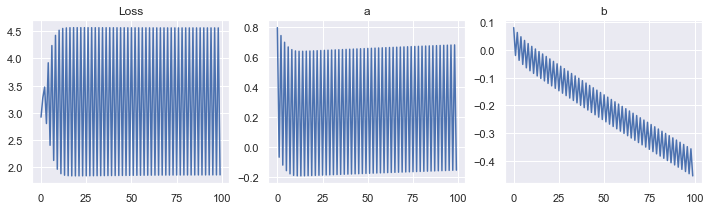

In [18]:
# Create figure with a subplot for each list of values
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3))

# Plot loss values
ax1.set_title('Loss')
ax1.plot(loss_values)

# Plot slope values
ax2.set_title('a')
ax2.plot(a_values)

# Plot intercept values
ax3.set_title('b')
ax3.plot(b_values)

plt.show()

In [19]:
import numpy as np

# Compute mean and std of input variable
print('Mean:', np.mean(data_df.body))
print('Std:', np.std(data_df.body))

Mean: 8.643076923076922
Std: 3.538620732204927


In [20]:
# Standardized input x
x_standardized = (x - 8.643) / 3.539

# Redefine graph (code from above)
# ----------------
# Compute predictions
y_hat = a*x_standardized + b

# Huber loss
loss = tf.losses.huber_loss(y, y_hat)

# Learning rate placeholder
lr = tf.placeholder(dtype=tf.float32)

# Create the optimizer
gd = tf.train.GradientDescentOptimizer(learning_rate=lr)

# Create a training operation
train_op = gd.minimize(loss)

In [25]:
# Monitor the a/b and loss values
loss_values = []
a_values = []
b_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Run 100 times the training operation
    for _ in range(100):
        # Run training op and collect a/b and loss values
        _, loss_val, a_val, b_val = sess.run(
            [train_op, loss, a, b],
            feed_dict={
                x: data_df.body, # Body weight
                y: data_df.brain, # Brain weight
                lr: 0.1 # Learning rate
        })
        
        # Save values
        loss_values.append(loss_val)
        a_values.append(a_val)
        b_values.append(b_val)

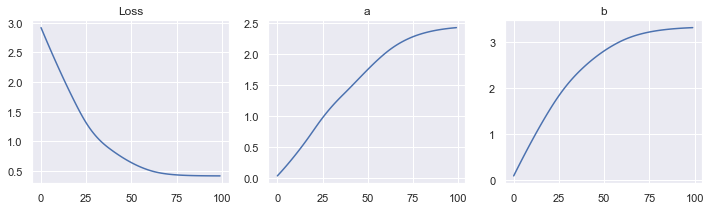

In [26]:
# Create figure with a subplot for each list of values
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3))

# Plot loss values
ax1.set_title('Loss')
ax1.plot(loss_values)

# Plot slope values
ax2.set_title('a')
ax2.plot(a_values)

# Plot intercept values
ax3.set_title('b')
ax3.plot(b_values)

plt.show()

### Predictions

In [27]:
# Create a hundred sample body weights
x_values = np.linspace(
    data_df.body.min(), # Between the minimum
    data_df.body.max(), # and maximum body weight values
    num=100
)

In [28]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Compute predictions
    y_values = sess.run(y_hat, feed_dict={
        x: x_values, # Sample body weights
        a: a_values[-1], # last slope value
        b: b_values[-1] # last intercept value
    })

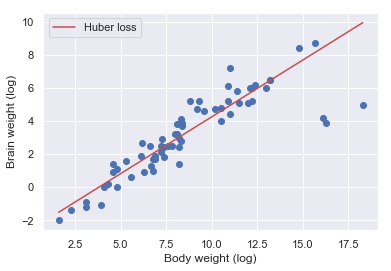

In [24]:
# Plot data with sample predictions
plt.scatter(data_df.body, data_df.brain, label=None)
plt.plot(x_values, y_values, label='Huber loss', color='C3')
plt.xlabel('Body weight (log)')
plt.ylabel('Brain weight (log)')
plt.legend()
plt.show()

Thanks to Huber loss, our linear regression ignores the three outliers and the line fits well the data points.